<a href="https://colab.research.google.com/github/johnreyes96/modeling-and-simulation/blob/master/src/main/python/CarSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/modeling_and_simulation

/content/drive/MyDrive/modeling_and_simulation


In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [4]:
carSales_df = pd.read_csv("car_sales.csv")

In [15]:
carSales_df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [8]:
carSales_df.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


# Análisis univariado

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

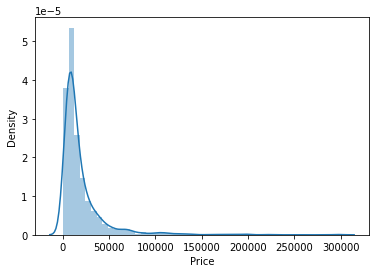

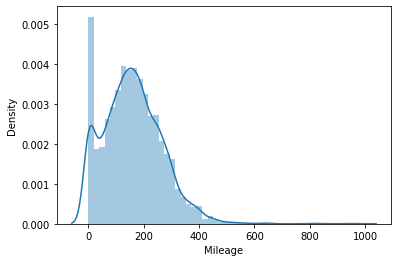

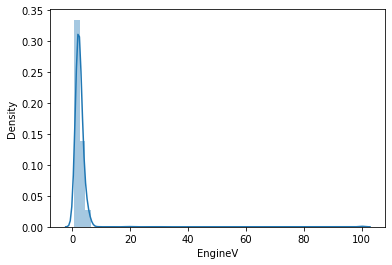

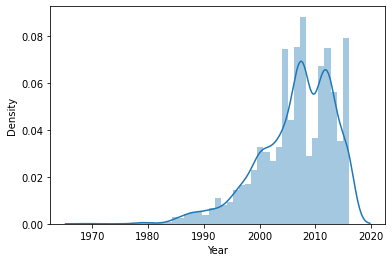

In [14]:
columns = ['Price', 'Mileage', 'EngineV', 'Year']
for i in columns:
    plt.figure()
    sns.distplot(carSales_df[i])

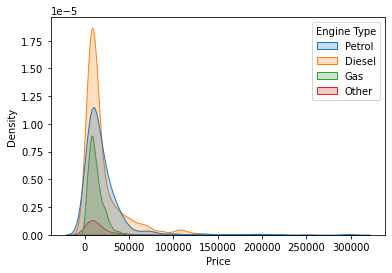

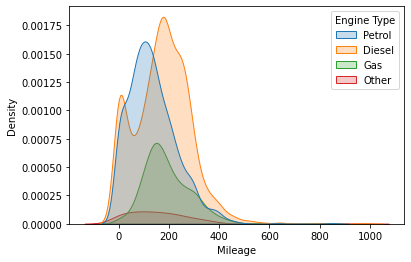

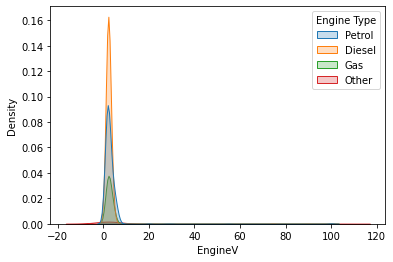

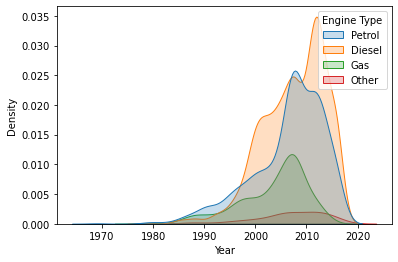

In [19]:
columns = ['Price', 'Mileage', 'EngineV', 'Year']
for i in columns:
    plt.figure()
    sns.kdeplot(carSales_df[i],shade=True,hue=carSales_df['Engine Type'])

In [22]:
carSales_df['Brand'].value_counts(normalize=True)

Volkswagen       0.215420
Mercedes-Benz    0.211968
BMW              0.159724
Toyota           0.124511
Renault          0.107940
Audi             0.105178
Mitsubishi       0.075259
Name: Brand, dtype: float64

In [23]:
carSales_df['Engine Type'].value_counts(normalize=True)

Diesel    0.464672
Petrol    0.358803
Gas       0.141082
Other     0.035443
Name: Engine Type, dtype: float64

In [45]:
carSales_df['Body'].value_counts(normalize=True)

sedan        0.381118
crossover    0.204720
van          0.155528
other        0.097888
vagon        0.094161
hatch        0.066584
Name: Body, dtype: float64

In [66]:
carSales_df['Model'].value_counts(normalize=True)

E-Class             0.046708
A6                  0.038758
Vito                0.038758
Kangoo              0.033789
Camry               0.031553
                      ...   
5                   0.000248
21                  0.000248
Vista               0.000248
T3 (Transporter)    0.000248
Scion               0.000248
Name: Model, Length: 306, dtype: float64

In [67]:
carSales_df['Price'].value_counts(normalize=True)

6500.00     0.009938
8500.00     0.009193
10500.00    0.008696
8900.00     0.008447
7500.00     0.008447
              ...   
6299.00     0.000248
44600.00    0.000248
35138.29    0.000248
22400.00    0.000248
12090.00    0.000248
Name: Price, Length: 892, dtype: float64

In [68]:
carSales_df['Mileage'].value_counts(normalize=True)

0      0.036522
1      0.027578
200    0.021118
250    0.018385
300    0.017391
         ...   
448    0.000248
525    0.000248
344    0.000248
316    0.000248
9      0.000248
Name: Mileage, Length: 407, dtype: float64

# Análisis bivariado

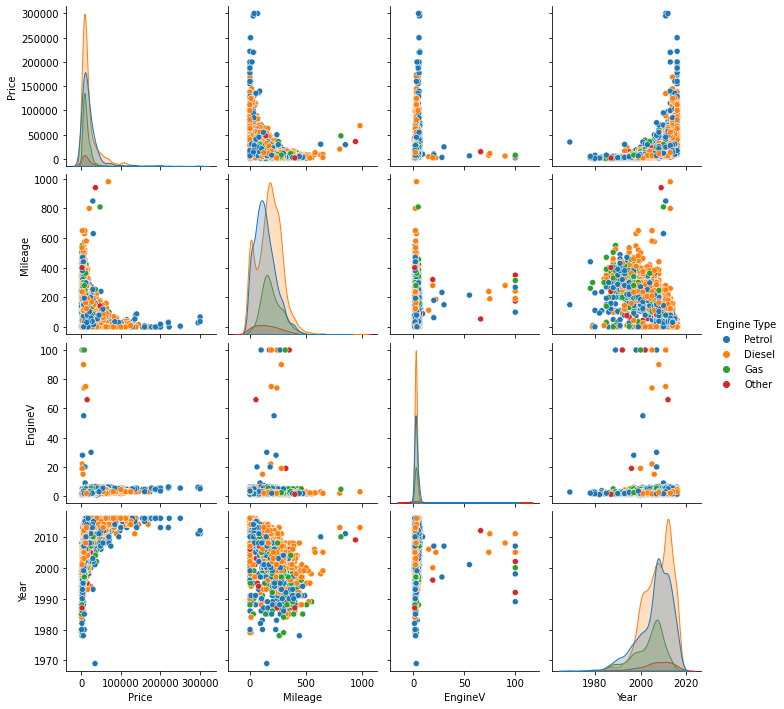

In [25]:
sns.pairplot(carSales_df,hue='Engine Type')

# Depurar datos nulos

In [40]:
carSales_df.dropna(inplace=True)

In [41]:
carSales_df.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

# Exploración de datos

# 1. ¿Cuál es la proporción de las ventas por marcas?

In [43]:
distribution = carSales_df["Brand"].value_counts()
fig = px.pie(values=distribution.values, names=["Volkswagen", "Mercedes-Benz", "BMW", "Toyota", "Renault", "Audi", "Mitsubishi"])
fig.show()

# 2. ¿Cuál es la proporción de las ventas por tipo de combustible?

In [44]:
distribution = carSales_df["Engine Type"].value_counts()
fig = px.pie(values=distribution.values, names=["Diesel", "Petrol", "Gas", "Other"])
fig.show()

# 3. ¿Cuál es la proporción de las ventas por tipo de vehículo?

In [47]:
distribution = carSales_df["Body"].value_counts()
fig = px.pie(values=distribution.values, names=["sedan", "crossover", "van", "other", "vagon", "hatch"])
fig.show()

# 4. Año de fabricación de los carros vendidos

In [50]:
carSales_df["Year"].value_counts()
df_years = carSales_df.groupby(["Year"]).size().reset_index(name='counts')
fig = px.line(df_years,x="Year",y="counts", title="Año de fabricación de los carros vendidos")
fig.show()

# 5. Diferencia de crecimiento de ventas de vehículos por tipo de combustible a lo largo de los años.

In [54]:
diesel = carSales_df[carSales_df["Engine Type"] == "Diesel"]
petrol = carSales_df[carSales_df["Engine Type"] == "Petrol"]
gas = carSales_df[carSales_df["Engine Type"] == "Gas"]
other = carSales_df[carSales_df["Engine Type"] == "Other"]

col = "Year"

vc1 = diesel[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = petrol[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

vc3 = gas[col].value_counts().reset_index()
vc3 = vc3.rename(columns = {col : "count", "index" : col})
vc3['percent'] = vc3['count'].apply(lambda x : 100*x/sum(vc3['count']))
vc3 = vc3.sort_values(col)

vc4 = other[col].value_counts().reset_index()
vc4 = vc4.rename(columns = {col : "count", "index" : col})
vc4['percent'] = vc4['count'].apply(lambda x : 100*x/sum(vc4['count']))
vc4 = vc4.sort_values(col)


trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="Diesel", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Petrol", marker=dict(color="#6ad49b"))
trace3 = go.Scatter(x=vc3[col], y=vc2["count"], name="Gas", marker=dict(color="#789dde"))
trace4 = go.Scatter(x=vc4[col], y=vc2["count"], name="Other", marker=dict(color="#de7878"))
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(title="Diferencia de crecimiento de ventas de vehículos por tipo de combustible a lo largo de los años", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()


# 6. Top 5 de los modelos mas vendidos

Cálculo total de ventas por modelo

In [57]:
model_number = {}

def count_models(one_row):
    if one_row in model_number.keys():
        count = model_number[one_row] + 1
        model_number[one_row] = count
    else:
        model_number[one_row] = 1

carSales_df["Model"].apply(count_models)

model = []
number =[]
for key,val in model_number.items():
    model.append(key)
    number.append(val)

model_n = {"model": model, "number": number}
model_df = pd.DataFrame.from_dict(model_n)

In [59]:
list_of_models = ["E-Class", "A6", "Vito", "Kangoo", "Camry"]
filt = model_df["model"].isin(list_of_models)
df_model_list = model_df.loc[filt,]

fig = px.bar(df_model_list, x="number",y="model", orientation="h")
fig.show()

# 7. Top 5 de los precios de vehículos mas vendidos

In [63]:
price_number = {}

def count_prices(one_row):
    if one_row in price_number.keys():
        count = price_number[one_row] + 1
        price_number[one_row] = count
    else:
        price_number[one_row] = 1

carSales_df["Price"].apply(count_prices)

price = []
number =[]
for key,val in price_number.items():
    price.append(key)
    number.append(val)

price_n = {"price": price, "number": number}
price_df = pd.DataFrame.from_dict(price_n)

In [64]:
list_of_models = [6500.00, 8500.00, 10500.00, 8900.00, 7500.00]
filt = price_df["price"].isin(list_of_models)
df_model_list = price_df.loc[filt,]

fig = px.bar(df_model_list, x="number",y="price", orientation="h")
fig.show()

# 8. Top 5 de los kilometrajes en vehículos mas vendidos

In [71]:
mileage_number = {}

def count_mileages(one_row):
    if one_row in mileage_number.keys():
        count = mileage_number[one_row] + 1
        mileage_number[one_row] = count
    else:
        mileage_number[one_row] = 1

carSales_df["Mileage"].apply(count_mileages)

mileage = []
number =[]
for key,val in mileage_number.items():
    mileage.append(key)
    number.append(val)

mileage_n = {"mileage": mileage, "number": number}
mileage_df = pd.DataFrame.from_dict(mileage_n)

In [72]:
list_of_models = [0, 1, 200, 250, 300]
filt = mileage_df["mileage"].isin(list_of_models)
df_model_list = mileage_df.loc[filt,]

fig = px.bar(df_model_list, x="number",y="mileage", orientation="h")
fig.show()

# Conclusión

1. Se venden mas carros 0km usados.
2. Se venden mas carros entre los precios 6.5k a 10.5k que en otros.
3. El modelo mas vendido fue el Mercedes-Benz E-Class.
4. Desde 1998 se alzó la venta de vehículos desde ese modelo que en años anteriores.
5. El tipo de vehículo mas vendido por las personas es el sedán.
6. Los carros que usan el tipo de combustible Deasel son los mas vendidos, seguido de Petroleo.
7. Las marcas de vehículo Volkswagen y Mercedes-Benz fueron las mas apetecidas por los clientes a la hora de comprar.
